<a href="https://colab.research.google.com/github/ManasaYenni/Manasa-CodSoft/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection  import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data= pd.read_csv('/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79313,57966,-0.527571,-3.483241,-0.206444,-0.583181,-2.067419,-0.129826,0.454118,-0.149176,1.863281,...,0.691203,0.224470,-0.875993,0.204226,0.079542,0.029189,-0.109220,0.178251,912.79,0.0
79314,57966,-0.541422,1.341092,0.576882,0.733835,0.259657,-0.233639,0.712069,0.190731,-1.067355,...,0.189997,0.493842,-0.141807,-0.406546,-0.043605,-0.287510,0.045194,0.100293,49.33,0.0
79315,57966,-0.830218,0.971781,0.974916,-1.348723,-0.230572,-0.778253,0.395464,0.109896,0.234581,...,-0.115767,-0.335950,-0.068152,-0.109514,-0.204347,0.703500,-0.383530,-0.223780,14.60,0.0
79316,57966,1.104838,-1.141651,0.942113,-0.661271,-1.591229,-0.056758,-1.192570,0.275125,-0.447900,...,0.508825,1.146845,-0.117753,0.241582,0.212189,-0.054096,0.023744,0.026206,99.00,0.0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,79318.000000,...,79317.000000,79317.000000,79317.000000,79317.000000,79317.000000,79317.000000,79317.000000,79317.000000,79317.000000,79317.000000
mean,37153.438249,-0.257426,-0.035576,0.678119,0.164591,-0.275998,0.095774,-0.114545,0.053468,-0.007344,...,-0.028990,-0.105797,-0.037871,0.007637,0.134631,0.026317,0.002125,0.002664,97.766923,0.002408
std,15151.789910,1.890179,1.681418,1.388884,1.369498,1.384464,1.305428,1.249211,1.234847,1.145285,...,0.740237,0.636321,0.629529,0.595742,0.440672,0.498252,0.390983,0.331492,269.644636,0.049013
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,30583.500000,-1.018001,-0.599132,0.187124,-0.724773,-0.894735,-0.642179,-0.604487,-0.141071,-0.684907,...,-0.224304,-0.524347,-0.178349,-0.323412,-0.129002,-0.326882,-0.063297,-0.005828,7.680000,0.000000
50%,39915.500000,-0.249380,0.069290,0.764923,0.183706,-0.308987,-0.153593,-0.073958,0.069131,-0.087263,...,-0.058679,-0.080550,-0.050441,0.063991,0.172875,-0.072550,0.009300,0.022860,26.900000,0.000000
75%,48863.000000,1.153594,0.722599,1.394720,1.045422,0.259201,0.490147,0.416184,0.349133,0.627928,...,0.117433,0.309236,0.080476,0.405157,0.421703,0.307988,0.082442,0.075999,89.150000,0.000000
max,57967.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,18.946734,4.014444,5.525093,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
data.isnull().sum().sum()

20

In [ ]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.76 % of the dataset
Frauds 0.24 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

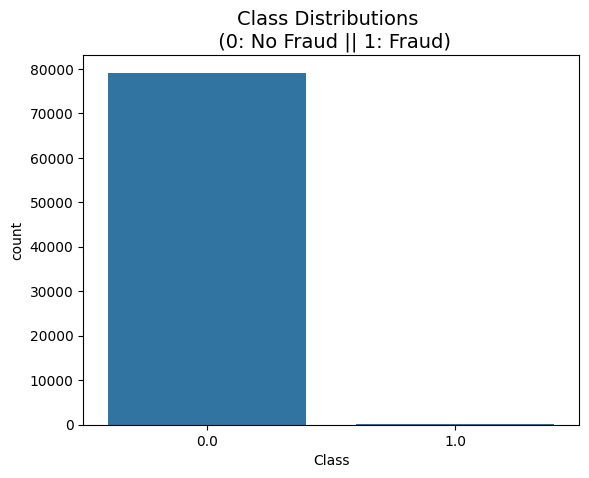

In [ ]:
sns.countplot(x='Class',data = data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [ ]:
tmp = data[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

In [ ]:
class_0.describe()

count    79126.000000
mean        97.773259
std        269.765878
min          0.000000
25%          7.700000
50%         26.925000
75%         89.000000
max      19656.530000
Name: Amount, dtype: float64

In [ ]:
class_1.describe()

count     191.000000
mean       95.142251
std       214.122813
min         0.000000
25%         1.000000
50%         7.520000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers;
# fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

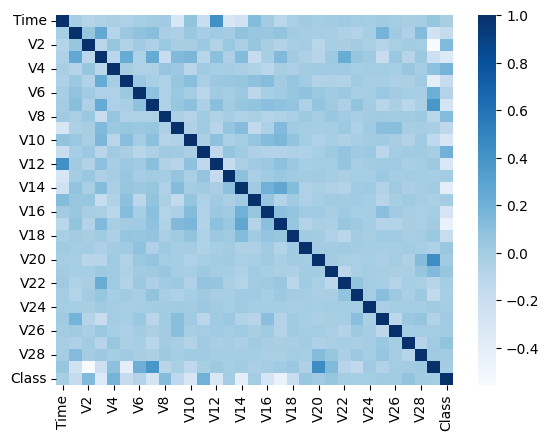

In [ ]:
dataplot = sns.heatmap(data.corr(), cmap="Blues")
plt.show()

In [ ]:
X = data.drop("Class", axis=1)
y = data['Class']

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.00000000e+00, 9.43114320e-01, 7.92887897e-01, ...,
        4.42109723e-01, 2.20791504e-01, 7.61171987e-03],
       [0.00000000e+00, 9.86831151e-01, 7.96587293e-01, ...,
        4.35493238e-01, 2.21614617e-01, 1.36850197e-04],
       [1.72511946e-05, 9.43139215e-01, 7.79054596e-01, ...,
        4.33340850e-01, 2.19901175e-01, 1.92638273e-02],
       ...,
       [9.99982749e-01, 9.52187600e-01, 8.04289154e-01, ...,
        4.18107534e-01, 2.16127429e-01, 7.42755715e-04],
       [9.99982749e-01, 9.85340277e-01, 7.81221332e-01, ...,
        4.37012345e-01, 2.21878779e-01, 5.03649423e-03],
       [1.00000000e+00, 9.05407406e-01, 8.31729337e-01, ...,
                   nan,            nan,            nan]])

In [ ]:
import numpy as np

print(np.isnan(y).sum())


1


In [ ]:
mask = ~np.isnan(y)
X = X[mask]
y = y[mask]

In [ ]:
from sklearn.model_selection import train_test_split

# Perform train-test split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
import pandas as pd

y_train_series = pd.Series(y_train)
print(y_train_series.value_counts())


Class
0.0    63301
1.0      152
Name: count, dtype: int64


In [ ]:
print(y_train.dtype)

float64


In [ ]:
# binning continuous values into discrete categories
bins = [0, 10, 20, 30]  # Adjust bins based on your data
labels = ['low', 'medium', 'high']
y_train_binned = pd.cut(y_train, bins=bins, labels=labels)
y_train_binned = y_train_binned.astype(str)  # Convert to string if needed


In [ ]:
print(X_train.shape)


(63453, 30)


In [ ]:
if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_series = pd.Series(y_train)
print(y_train_series.value_counts())

Class
0.0    63301
1.0      152
Name: count, dtype: int64


In [ ]:
def evaluate(model):
  model.fit(X_train,y_train)
  pre = model.predict(X_test)

  accuracy = accuracy_score(pre,y_test)
  recall = recall_score(pre,y_test)
  f1 = f1_score(pre,y_test)

  sns.heatmap(confusion_matrix(pre,y_test),annot=True)
  print(model)
  print("Accuracy : ",accuracy,"Recall : ",recall,"F1 : ",f1)

In [ ]:
model_LR = LogisticRegression()

In [ ]:
#perform cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

clf_lsr_cv = GridSearchCV(model_LR,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.9823210203666823


In [ ]:
if X_train.ndim == 1:
    X_train = X_train.reshape(-1, 1)
if X_test.ndim == 1:
    X_test = X_test.reshape(-1, 1)


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (63453, 30)
Shape of X_test: (15864, 30)
Shape of y_train: (63453,)
Shape of y_test: (15864,)


In [ ]:
from sklearn.linear_model import LogisticRegression

lsr_best = LogisticRegression(penalty='l2', C=1000.0, random_state=42)
lsr_clf = lsr_best.fit(X_train, y_train)

In [ ]:
# Assuming evaluate is a custom function for model evaluation
# Replace 'evaluate' with the actual evaluation method
def evaluate(model, X_test, y_test):
    from sklearn.metrics import accuracy_score, classification_report
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate the model
evaluate(lsr_clf, X_test, y_test)

Accuracy: 0.998613212304589
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15825
         1.0       0.79      0.59      0.68        39

    accuracy                           1.00     15864
   macro avg       0.90      0.79      0.84     15864
weighted avg       1.00      1.00      1.00     15864



In [ ]:
model_KNN = KNeighborsClassifier()

In [ ]:
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
for k in k_range:
  model_KNN  = KNeighborsClassifier(n_neighbors=k)
  model_KNN .fit(X_train,y_train)
  score = cross_val_score(model_KNN , X_train, y_train, cv=3, n_jobs = -1)
  scores.append(score.mean())

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

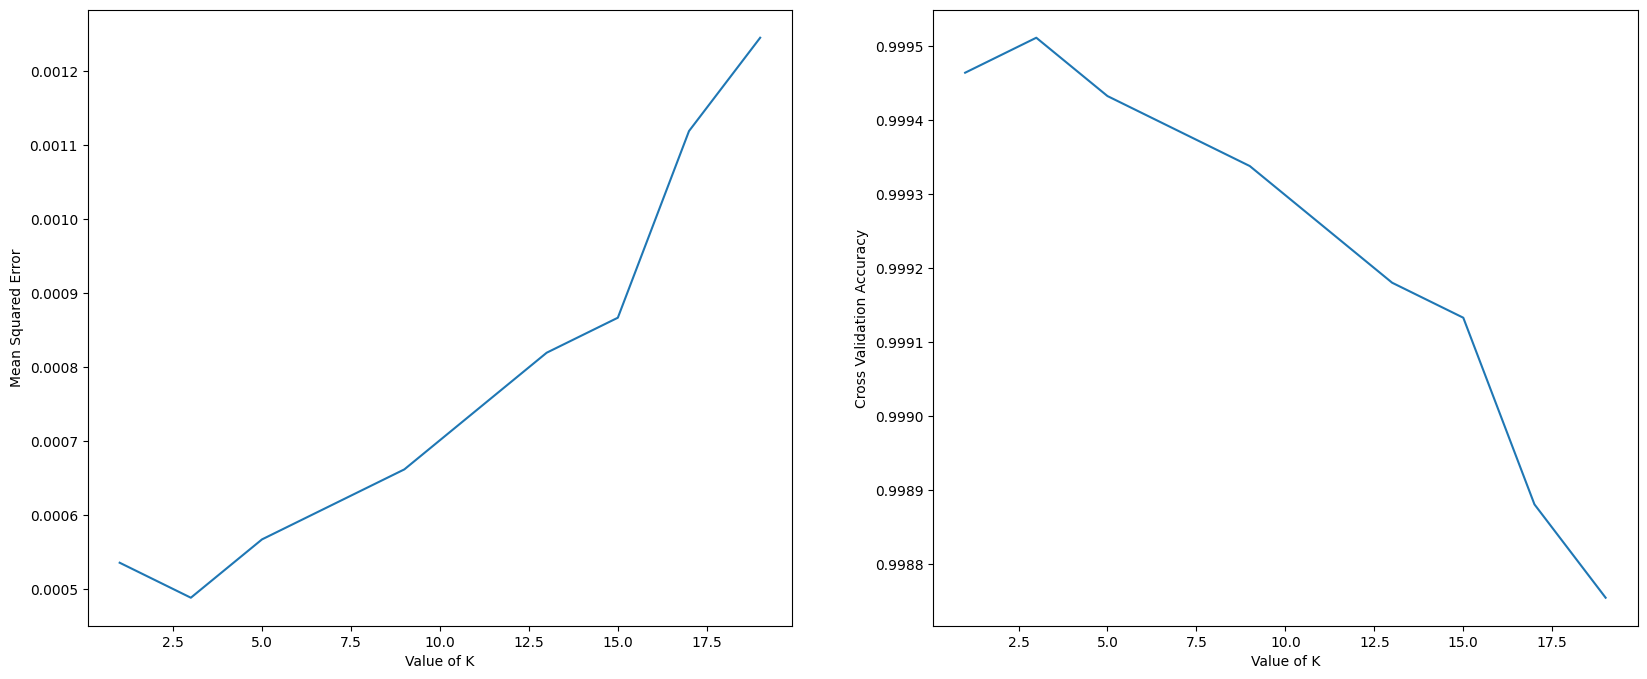

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(x=k_range,y=mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(x=k_range,y=scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")

plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)

evaluate(knn_clf, X_test, y_test)

Accuracy: 0.9993696419566314
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15825
         1.0       1.00      0.74      0.85        39

    accuracy                           1.00     15864
   macro avg       1.00      0.87      0.93     15864
weighted avg       1.00      1.00      1.00     15864



In [ ]:
model_RFC = RandomForestClassifier()

In [ ]:
# Using grid search cv to find the best parameters.

param = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [2, 3, 4, 7, 9]}
clf_rfc_cv = GridSearchCV(model_RFC, param, cv=5,scoring='roc_auc', n_jobs=-1)
clf_rfc_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_rfc_cv.best_params_)
print("accuracy :",clf_rfc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 9, 'n_estimators': 30}
accuracy : 0.9853983535696104


In [ ]:
#Fitting model

rf = RandomForestClassifier(max_depth=9, n_estimators=50)
RFC_clf = rf.fit(X_train,y_train)

evaluate(RFC_clf, X_test, y_test)

Accuracy: 0.9991805345436208
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     15825
         1.0       0.93      0.72      0.81        39

    accuracy                           1.00     15864
   macro avg       0.97      0.86      0.91     15864
weighted avg       1.00      1.00      1.00     15864



In [ ]:
model_ANN = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),

    Dense(16, activation='relu'),

    Dense(8, activation='relu'),

    Dense(1, activation='sigmoid')
])

model_ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else np.array(X_train)
y_train = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)


In [ ]:
import numpy as np

if isinstance(X_train, pd.DataFrame) or isinstance(X_train, pd.Series):
    X_train = X_train.values
if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
    y_train = y_train.values


In [ ]:
history = model_ANN.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
794/794 [==============================] - 5s 3ms/step - loss: 0.0320 - accuracy: 0.9975 - val_loss: 0.0110 - val_accuracy: 0.9981
Epoch 2/50
794/794 [==============================] - 2s 2ms/step - loss: 0.0106 - accuracy: 0.9977 - val_loss: 0.0062 - val_accuracy: 0.9983
Epoch 3/50
794/794 [==============================] - 2s 2ms/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.0042 - val_accuracy: 0.9986
Epoch 4/50
794/794 [==============================] - 2s 2ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 5/50
794/794 [==============================] - 2s 2ms/step - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0031 - val_accuracy: 0.9990
Epoch 6/50
794/794 [==============================] - 2s 2ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0033 - val_accuracy: 0.9989
Epoch 7/50
794/794 [==============================] - 3s 4ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0029 - val_accuracy: 0.9988
Epoch 

In [ ]:
y_pred = model_ANN.predict(X_test)
y_pred = (y_pred > 0.5)

496/496 [==============================] - 2s 3ms/step


In [ ]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n       False       1.00      1.00      1.00     15835\n        True       0.72      0.97      0.82        29\n\n    accuracy                           1.00     15864\n   macro avg       0.86      0.98      0.91     15864\nweighted avg       1.00      1.00      1.00     15864\n'

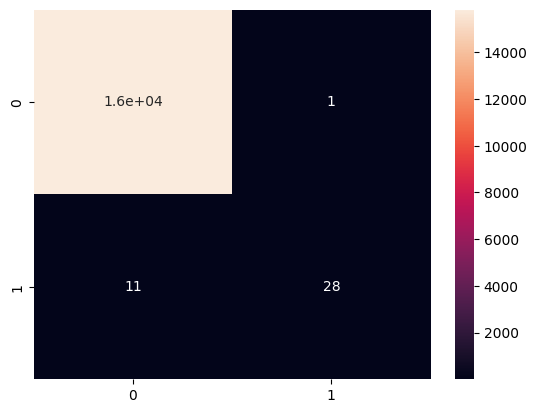

In [ ]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
print(X.shape)

(79317, 30)


In [ ]:
if X.ndim == 1:
    X = X.reshape(-1, 1)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
X

array([[0.00000000e+00, 9.43114320e-01, 7.92887897e-01, ...,
        4.42109723e-01, 2.20791504e-01, 7.61171987e-03],
       [0.00000000e+00, 9.86831151e-01, 7.96587293e-01, ...,
        4.35493238e-01, 2.21614617e-01, 1.36850197e-04],
       [1.72511946e-05, 9.43139215e-01, 7.79054596e-01, ...,
        4.33340850e-01, 2.19901175e-01, 1.92638273e-02],
       ...,
       [9.99982749e-01, 9.57135446e-01, 8.08320130e-01, ...,
        4.38008041e-01, 2.23583264e-01, 2.50959859e-03],
       [9.99982749e-01, 9.52187600e-01, 8.04289154e-01, ...,
        4.18107534e-01, 2.16127429e-01, 7.42755715e-04],
       [9.99982749e-01, 9.85340277e-01, 7.81221332e-01, ...,
        4.37012345e-01, 2.21878779e-01, 5.03649423e-03]])

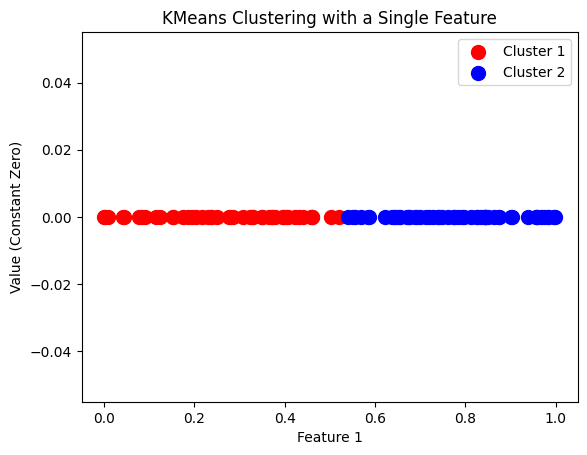

In [ ]:
#Scatter plot with a single feature
from sklearn.cluster import KMeans

# Example data with a single feature
X = np.random.rand(100, 1)

# Fit and predict with KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Scatter plot with a single feature
plt.scatter(X[y_kmeans == 0], np.zeros_like(X[y_kmeans == 0]), s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1], np.zeros_like(X[y_kmeans == 1]), s=100, c='blue', label='Cluster 2')
plt.xlabel('Feature 1')
plt.ylabel('Value (Constant Zero)')
plt.legend()
plt.title('KMeans Clustering with a Single Feature')
plt.show()

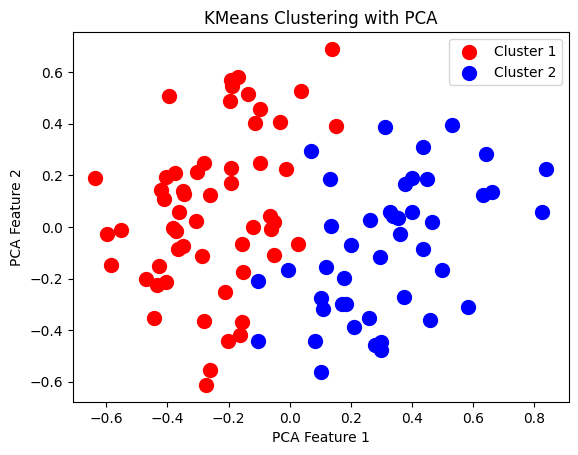

In [ ]:
# OR
#Using PCA for dimensionality reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Example data with multiple features
X = np.random.rand(100, 5)  # Assuming multiple features for demonstration

# Fit and predict with KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot with PCA-reduced features
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.title('KMeans Clustering with PCA')
plt.show()